In [ ]:
import os 

path_bea = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/bea_all_depolymerase.db"

clean_db = open(f"{path_bea}/bead_depo/bea_depo.DB.fasta").read().split(">")[1:]

curated_db = open(f"{path_bea}/Bea_depolymerase.curated.multi.fasta").read().split(">")[1:]

len(clean_db) , len(curated_db)

***
## Venn diagram : 

> Anubis : 

In [34]:
import os 
import pandas as pd
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')

# local :
path_project = "/media/concha-eloko/Linux/PPT_clean"

info_col = ["prot_name","start","end","domain_seq","full_seq","dpo_index"]

df_prophage_label = pd.read_csv(f"{path_project}/prophage_data.clusters_80.phageboost_70.2504.tsv" , sep = "\t", skiprows=1)
df_prophage_label.columns = ["Prophage_name","KL_type","Infected_ancestor","n_clades","siblings","n_ancestors","n_KL_swaps","old_KL_types","all_old_KL_types"]

df_anubis_return_emb = pd.read_csv(f"{path_project}/embeddings/anubis_return.esm2.embedding.csv" , sep = ",", header = None)
df_anubis_return_info = pd.read_csv(f"{path_project}/Anubis_return.predictions.0709.big.annotated.tsv" , sep = "\t", names = info_col)
anubis_sequences = df_anubis_return_info["full_seq"].unique().tolist()
len(anubis_sequences)



4308

> ppt :

In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/15122022_session/Results_III_DataFrame.v3.csv \
/media/concha-eloko/Linux/PPT_clean 


In [35]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"

labels_results = ["protein_name","KL_type_ancestor","ancestor_id","IPR_entry","score","qstart","qstop","sequence"]
results_df = pd.read_csv(f"{path_project}/Results_III_DataFrame.v3.csv", sep="\t", names= labels_results)
ppt_seq_uniq = results_df["sequence"].unique().tolist()

> Minibatch : 


In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/Bea_hits.seq_unique.fasta \
/media/concha-eloko/Linux/PPT_clean 

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/Minibatch_hits.75bits.tsv \
/media/concha-eloko/Linux/PPT_clean 


In [36]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"
path_work = "/media/concha-eloko/Linux/PPT_clean"

#minibatch_seq_uniq = [item.split("\n")[1] for item in open(f"{path_project}/Bea_hits.seq_unique.fasta").read().split(">")[1:]]
DF_info_mini = pd.read_csv(f"{path_work}/Minibatch_hits.75bits.tsv", sep = "\t" ,  names = ["protein", "bitscore","sequence"])
minibatch_seq_uniq = set(seq for seq in DF_info_mini["sequence"] if len(seq)<1500)



> Final DF : 


In [37]:
path_work = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df.tsv", sep = "\t" ,  header = 0)
DF_lvl_0 = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]


In [38]:
final_unique = DF_lvl_0["seq"].unique().tolist()

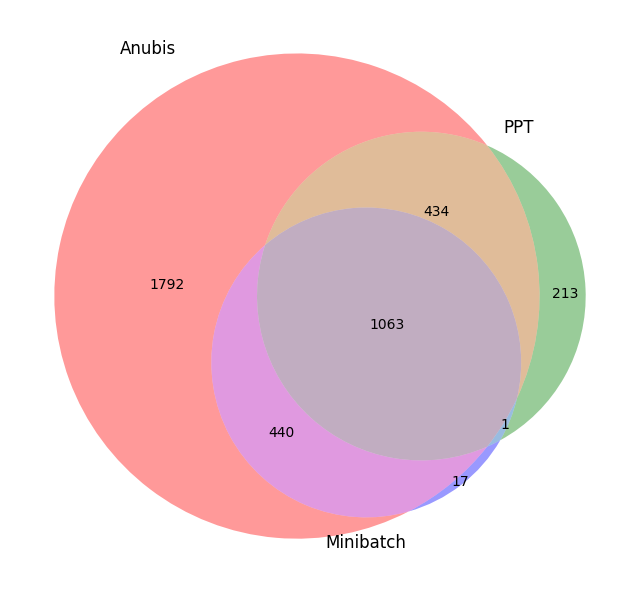

In [39]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set_anubis = set(anubis_sequences)
set_minibatch = set(minibatch_seq_uniq)
set_ppt = set(ppt_seq_uniq)
set_final = set(final_unique)

pred_anubis = set_anubis.intersection(set_final)
pred_ppt = set_ppt.intersection(set_final)
pred_minibatch = set_minibatch.intersection(set_final)


# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn3([pred_anubis, pred_ppt, pred_minibatch], ('Anubis', 'PPT', "Minibatch"))

# Display the plot
plt.show()

In [21]:
classic_methods = pred_ppt.copy()
classic_methods.update(pred_minibatch)

anubis_exclu = pred_anubis.difference(classic_methods)

In [26]:
classic_gold = classic_methods.difference(pred_anubis)
len(classic_gold)

247

In [31]:
common_classic = pred_ppt.intersection(pred_minibatch)
classic_gold = common_classic.difference(pred_anubis)


In [33]:
classic_gold

{'MAEVPLPTPTQVPVPSTDIRNAVFAGAKLDEEVTGAGEFYTDRLGVKRLTNTGRNNQFDAAQLDRANRFEQFLLSSGYVFLGDYEDGPFQFSARNQYIRYNNQYYRLNAATDVGFTTTGTDATSFANDVTHFVLMDGDTLRSNLGSSEEGMGDDIVTHSDGKTVREHIKYLERDKLSFYGSTATGLLNFLAYAAASGRECIVDTVVNLTVAVNFDAQFSNIHLRWEAPINSDTQLFNLHNLGPKSILKDMWFQNITAPWVINRWDTDGNWIDNAEIIANSVVQTNEEAGYQPTASDKDVWPLLSDTVKNQQICGGPIIHTSRGVTVLNPRGRYIAITFMDCNFCKVVQPSVMGGKHQYGTILFNNTGTTAWGKGNKVIDGEVRYGSVSGVVYMRHKGKSSRISGTNAYRCGESGFKTYQNEVNGRSARCYGMKWDNLTAEQCYFDGFDLASDYGDAAQRVDDYKLEQFAWNLLPLKHEVTNLTGLC'}

***
# Get the fold proportions : 

> From PPT :

In [9]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"

labels_results = ["protein_name","KL_type_ancestor","ancestor_id","IPR_entry","score","qstart","qstop","sequence"]
results_df = pd.read_csv(f"{path_project}/Results_III_DataFrame.v3.csv", sep="\t", names= labels_results)
ppt_seq_uniq = results_df["sequence"].unique().tolist()

In [43]:
results_df

,protein_name,KL_type_ancestor,ancestor_id,IPR_entry,score,qstart,qstop,sequence
0,GCF_016651625.1__phage29__132,KL43,GCF_016651625.1,IPR013830.70,20.6,31,76,MKIALMMENSQANKNAIILKELNAVADEKGFPVYNVGMSDENDHHL...
1,GCF_016651625.1__phage29__142,KL43,GCF_016651625.1,IPR005604.78,122.8,6,154,MSVPNQTPYNIYTANGLTTVFTYEFYIISASDLRVSINGDVVTSGY...
2,GCF_016651625.1__phage29__142,KL43,GCF_016651625.1,IPR005604.70,102.6,8,111,MSVPNQTPYNIYTANGLTTVFTYEFYIISASDLRVSINGDVVTSGY...
3,GCF_016651625.1__phage29__137,KL43,GCF_016651625.1,IPR013785.74,33.8,52,146,MFSGLCAFPLTPLHQQKFDEKAFIRILARLTDAGVDSLGILGSTGS...
4,GCF_016651625.1__phage29__137,KL43,GCF_016651625.1,IPR013785.25,26.3,20,129,MFSGLCAFPLTPLHQQKFDEKAFIRILARLTDAGVDSLGILGSTGS...
...,...,...,...,...,...,...,...,...
351284,GCF_900513205.1__phage12__17,KL107,n2882,IPR002925.1,21.6,77,259,MAFVTTQDGVNIYFKDWGPKEAQPIVFHHGWPLSADDWDNQMLFFL...
351285,GCF_900513205.1__phage12__17,KL107,n2882,IPR002925.63,21.2,21,59,MAFVTTQDGVNIYFKDWGPKEAQPIVFHHGWPLSADDWDNQMLFFL...
351286,GCF_900513205.1__phage12__17,KL107,n2882,IPR002925.54,20.7,18,261,MAFVTTQDGVNIYFKDWGPKEAQPIVFHHGWPLSADDWDNQMLFFL...
351287,GCF_900513205.1__phage12__17,KL107,n2882,IPR002925.20,20.1,214,264,MAFVTTQDGVNIYFKDWGPKEAQPIVFHHGWPLSADDWDNQMLFFL...


In [40]:
path_work = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df.tsv", sep = "\t" ,  header = 0)
DF_lvl_0 = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]

final_unique = DF_lvl_0["seq"].unique().tolist()

In [41]:
set_ppt = set(ppt_seq_uniq)
set_final = set(final_unique)
pred_ppt = set_ppt.intersection(set_final)

In [42]:
len(pred_ppt)

1711

> Get the index : 

In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/15122022_session/Results_III_sequences.v3.csv \
/media/concha-eloko/Linux/PPT_clean 

In [14]:
index_df = pd.read_csv("/media/concha-eloko/Linux/PPT_clean/Results_III_sequences.v3.csv", sep = "\t", names = ["index", "seq"])
index_df

,index,seq
0,0,MKIALMMENSQANKNAIILKELNAVADEKGFPVYNVGMSDENDHHL...
1,1,MSVPNQTPYNIYTANGLTTVFTYEFYIISASDLRVSINGDVVTSGY...
2,2,MFSGLCAFPLTPLHQQKFDEKAFIRILARLTDAGVDSLGILGSTGS...
3,3,MLSTTAFLAIAMQCAASIHPSTAFDVARVESGFNPYAIAEIVPKAG...
4,4,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...
...,...,...
7150,7150,MLGGFIVFIAFMNFAQGGDIRNVSQPEIPLSCKVLKADKSVDSTRA...
7151,7151,MIVSAPSDYREAARRRLPRFLFDYIDGGAVAENTMNANATELASVA...
7152,7152,MTQSAMCIPLWPARNGNTAHLVMCPFAGGSSSAFRHWQAEQLADCA...
7153,7153,MVAKSIVDIDVNDDKFVAFMERFREYQSALDDLPEAWRVAAVGIGE...


In [22]:
from Bio.PDB import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

path_ppt_pdb = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/output_ppt"

dico_seq_index = {}
parser = PDBParser()
ppb = PPBuilder()

for pdb_file in tqdm(os.listdir(path_ppt_pdb)) :
    index_file = pdb_file.split(".")[0]
    structure = parser.get_structure('PDB_structure', f"{path_ppt_pdb}/{index_file}.pdb")
    for pp in ppb.build_peptides(structure):
        sequence = pp.get_sequence()
        dico_seq_index[index_file] = str(sequence)


In [32]:
import pandas as pd
import os 
from tqdm import tqdm

path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_PPT"

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)

dico_folds_ppt = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]

undone_ppt_seq = set()
missing_index = []
for seq in pred_ppt : 
    for index, index_seq in dico_seq_index.items() :
        if seq == index_seq :
            results_df = pd.read_csv(f"{dir_out}/{index}.out", sep = "\t" , names = header_seekfold)
            for _,row in results_df.iterrows() :
                fold = info_df[info_df["ID"] == row["target"]]["Folds"].values[0]
                if fold not in ["jelly-roll", "Other"] :
                    if row["prob"] >= 0.5 :
                        if row["query"] not in dico_folds_ppt[fold] :
                            n += 1
                            dico_folds_ppt[fold].append(row["query"])
                            break
                    elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                        if row["query"] not in dico_folds_ppt[fold] :
                            n += 1
                            dico_folds_ppt[fold].append(row["query"])
                            break
    else :
        len_seq = len(seq)
        a = (len_seq , )
        undone_ppt_seq.add(seq)


In [33]:
len(undone_ppt_seq)

for fold in dico_folds_ppt : 
    print(f"The {fold} presented {len(dico_folds_ppt[fold])} depolymerases.\n")

The jelly-roll presented 0 depolymerases.

The alpha/alpha toroid presented 3 depolymerases.

The right-handed beta-helix presented 1344 depolymerases.

The TIM beta/alpha-barrel presented 158 depolymerases.

The 6-bladed beta-propeller presented 63 depolymerases.

The Flavodoxin-like presented 0 depolymerases.

The Alpha/Beta hydrolase fold presented 65 depolymerases.

The Other presented 0 depolymerases.



In [7]:
import pandas as pd
import os 
from tqdm import tqdm

path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_PPT"

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)

dico_folds_ppt = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
depo_results = {}
n = 0

for results in outputs :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["Folds"].values[0]
        if fold not in ["jelly-roll", "Other"] :
            if row["prob"] >= 0.5 :
                if row["query"] not in dico_folds_ppt[fold] :
                    n += 1
                    dico_folds_ppt[fold].append(row["query"])
                    break
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                if row["query"] not in dico_folds_ppt[fold] :
                    n += 1
                    dico_folds_ppt[fold].append(row["query"])
                    break
                    
                
for fold in dico_folds_ppt : 
    print(f"The {fold} presented {len(dico_folds_ppt[fold])} depolymerases.\n")

The jelly-roll presented 0 depolymerases.

The alpha/alpha toroid presented 19 depolymerases.

The right-handed beta-helix presented 1443 depolymerases.

The TIM beta/alpha-barrel presented 317 depolymerases.

The 6-bladed beta-propeller presented 65 depolymerases.

The Flavodoxin-like presented 0 depolymerases.

The Alpha/Beta hydrolase fold presented 125 depolymerases.

The Other presented 0 depolymerases.



In [8]:
n

1969